Data Understanding & Preprocessing

In [1]:
import pandas as pd

In [2]:
pd.read_csv("heart.csv")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
h=pd.read_csv("heart.csv")

In [8]:
print(h.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


Explore the Data

In [11]:
# 📌 Step 2: Explore the Data

# Show first 5 rows to understand the dataset
df=pd.read_csv("heart.csv")

# Show the shape of the dataset (rows, columns)
print(f"Shape of dataset: {df.shape}")

# Show data types and non-null counts
print("\n🔍 Data Info:")
df.info()

# Check for missing values
print("\n🧹 Missing Values in Each Column:")
print(df.isnull().sum())

# Basic statistical summary (for numeric columns)
print("\n📊 Statistical Summary:")
print(df.describe())


Shape of dataset: (1025, 14)

🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

🧹 Missing Values in Each Column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0

Data Cleaning & Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Check again for missing values
print("Missing values:")
print(df.isnull().sum())

# 3. Separate features (X) and target (y)
X = df.drop("target", axis=1)  # ✅ Make sure your target column is named "target"
y = df["target"]

# 4. Normalize/scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\n Preprocessing complete. Data ready for modeling!")


Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

✅ Preprocessing complete. Data ready for modeling!


Model Building & Evaluation

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# 1. Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# 2. Make predictions
y_pred = model.predict(X_test)

# 3. Evaluate performance
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Precision:", precision_score(y_test, y_pred))
print(" Recall:", recall_score(y_test, y_pred))
print(" F1 Score:", f1_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.7951219512195122
 Precision: 0.7563025210084033
 Recall: 0.8737864077669902
 F1 Score: 0.8108108108108109

 Confusion Matrix:
 [[73 29]
 [13 90]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



Visualization of Model Performance

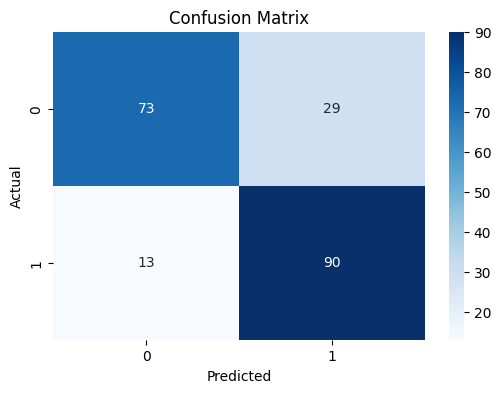

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Visual Exploration with Regression Graphs

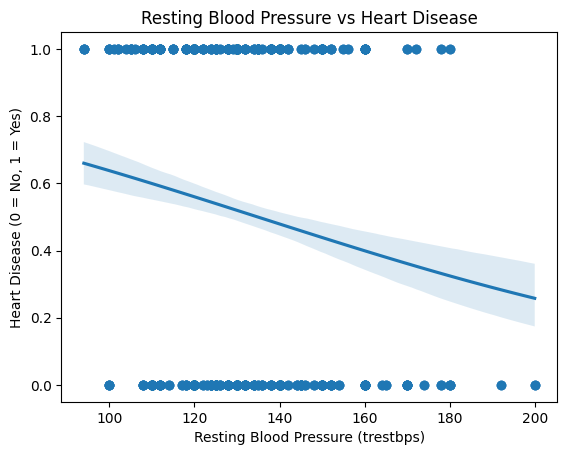

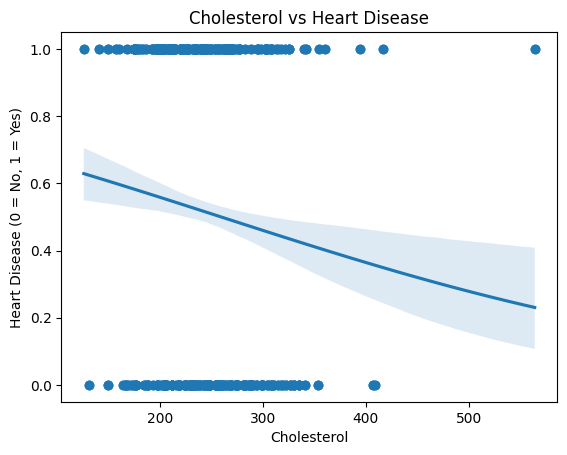

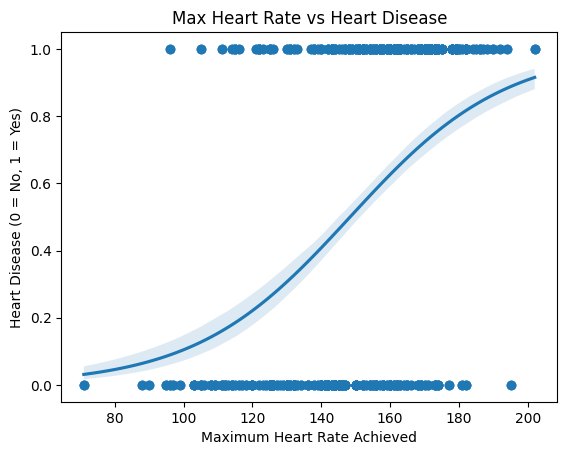

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Blood Pressure vs Heart Disease
sns.regplot(x='trestbps', y='target', data=df, logistic=True)
plt.title('Resting Blood Pressure vs Heart Disease')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.show()

# Cholesterol vs Heart Disease
sns.regplot(x='chol', y='target', data=df, logistic=True)
plt.title('Cholesterol vs Heart Disease')
plt.xlabel('Cholesterol')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.show()

# Max Heart Rate vs Heart Disease
sns.regplot(x='thalach', y='target', data=df, logistic=True)
plt.title('Max Heart Rate vs Heart Disease')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Heart Disease (0 = No, 1 = Yes)')
plt.show()


## 📊 Feature Correlation (Bonus Insight)

We explored how key health indicators (cholesterol, heart rate, and blood pressure) relate to heart disease using regression plots. This step helps us understand the *clinical patterns* behind the prediction and adds medical relevance to our project.
